# Results of velocity and attenuation variablities

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd

data_dir='/fd1/QibinShi_data/England_farm/'

### b variability in space

In [5]:
h5f = h5py.File(data_dir+'enhanced_dvv_intb/FarmDAS_demean_dvv_intb.h5', 'r')
absdv=h5f['demean_dvv'][:]
absintb=h5f['demean_intb'][:]
h5f.close()

### b-value in space and time

In [6]:
h5f = h5py.File(data_dir+'enhanced_dvv_intb/FarmDAS_channels_dvv_intb.h5', 'r')
enhanced_dvv=h5f['enhanced_dvv'][:]
enhanced_cc=h5f['enhanced_cc'][:]
VB=h5f['estimated_intb'][:]
h5f.close()

In [7]:
print("Min of dvv %.4f"%np.min(enhanced_dvv), ", Max of dvv %.4f"%np.max(enhanced_dvv))
print("Min of cc %.4f"%np.min(enhanced_cc), ", Max of cc %.4f"%np.max(enhanced_cc))
print("Min of int-b %.4f"%np.min(VB), ", Max of int-b %.4f"%np.max(VB))

Min of dvv -0.3210 , Max of dvv 1.0630
Min of cc 0.1641 , Max of cc 0.7305
Min of int-b 0.0020 , Max of int-b 76.7700


In [8]:
nlocs=enhanced_dvv.shape[0]
locs=np.arange(44,44+nlocs)
nwin=enhanced_dvv.shape[1]

### Plot the space-time dV/V and b

Text(0, 0.5, 'Distance (m)')

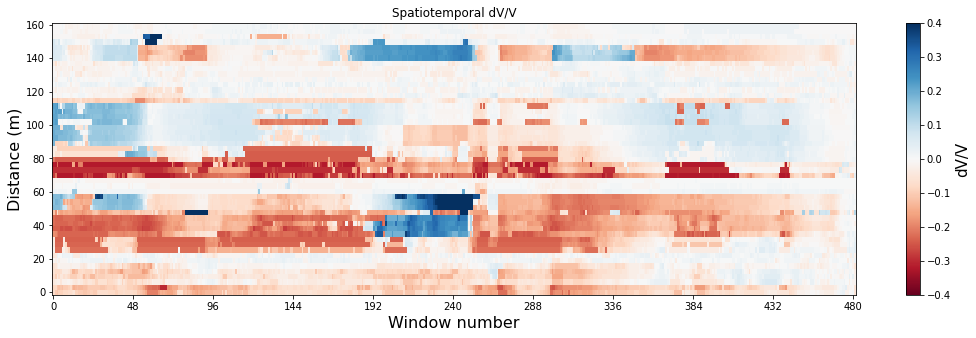

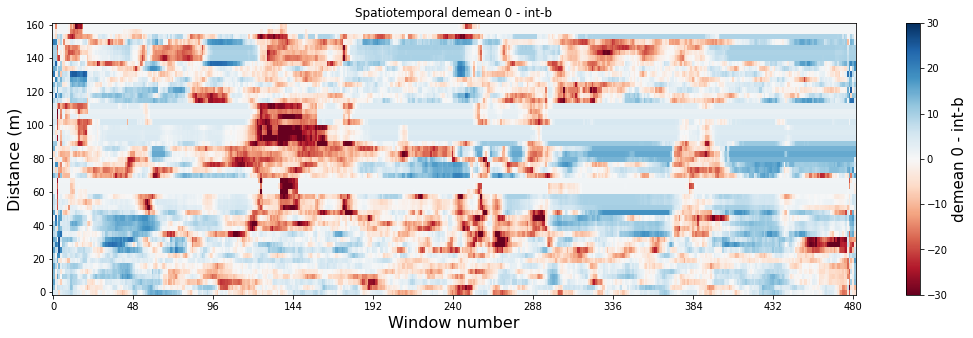

In [29]:
dchan=3.19
x=np.arange(nwin)
xax=np.arange(0, x.shape[-1], 48)
VV=enhanced_dvv

# improved version (find_peaks)
plt.figure(figsize=(18, 5))
plt.pcolormesh(x, np.arange(51)*dchan, VV, shading='auto', vmin=-0.4, vmax=0.4, cmap = 'RdBu')
plt.title('Spatiotemporal dV/V')
plt.xticks(xax, fontsize = 10)
bar=plt.colorbar()
bar.set_label('dV/V', fontsize = 15)
plt.xlabel("Window number", fontsize = 16)
plt.ylabel("Distance (m)", fontsize = 16)


# improved version (find_peaks)
plt.figure(figsize=(18, 5))
plt.pcolormesh(x, np.arange(51)*dchan, np.mean(VB, axis=1, keepdims=True)-VB, shading='auto', vmin=-30, vmax=30, cmap = 'RdBu')
plt.title('Spatiotemporal demean 0 - int-b')
plt.xticks(xax, fontsize = 10)
bar=plt.colorbar()
bar.set_label('demean 0 - int-b', fontsize = 15)
plt.xlabel("Window number", fontsize = 16)
plt.ylabel("Distance (m)", fontsize = 16)

get max(dv)-min(dv) on each channel, window number : 160-250

enhanced dvv: this version uses the last 1 hour mean value to demean entire dvv series

### Spatial comparison of variabilities in dV/V and b

(51, 482)


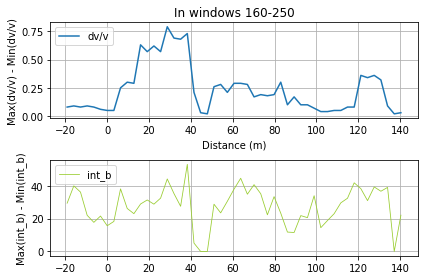

In [10]:
dist=np.zeros(nlocs)
absdv=np.zeros(nlocs)
absintb=np.zeros(nlocs)
demean_VB=VB.copy()

for chan in range(nlocs):
    demean_VB[chan]=VB[chan]-np.mean(VB[chan, -6:])
for chan in range(nlocs):
    dist[chan]=(chan-6)*dchan
    absdv[chan]=np.max(enhanced_dvv[chan,160:250])-np.min(enhanced_dvv[chan,160:250])
    absintb[chan]=np.max(demean_VB[chan,160:250])-np.min(demean_VB[chan,160:250])

fig,ax= plt.subplots(2,1,figsize=(6,4))

ax[0].plot(dist,absdv,label='dv/v')
ax[1].plot(dist,absintb,label='int_b',color='yellowgreen',linewidth=0.8)
ax[0].set_xlabel('Distance (m)')
ax[0].set_ylabel('Max(dv/v) - Min(dv/v)')
ax[0].set_title('In windows 160-250')
ax[1].set_ylabel('Max(int_b) - Min(int_b)')
for k in range(2):
    ax[k].grid(True)
    ax[k].legend(loc='upper left')
plt.tight_layout()
print(demean_VB.shape)


### Temporal comparison of dV/V and b at every channel

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


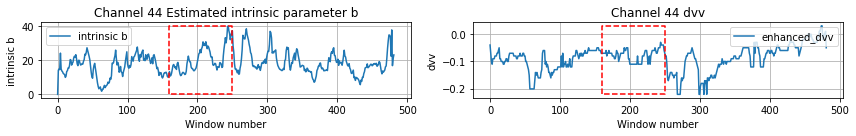

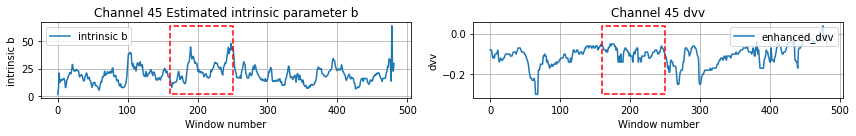

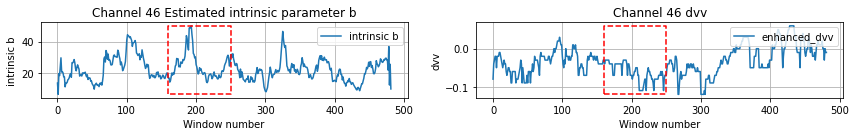

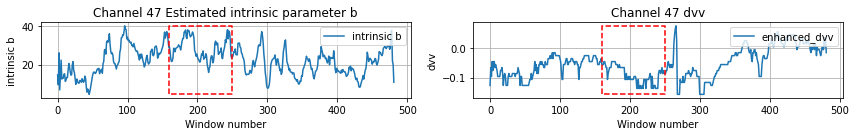

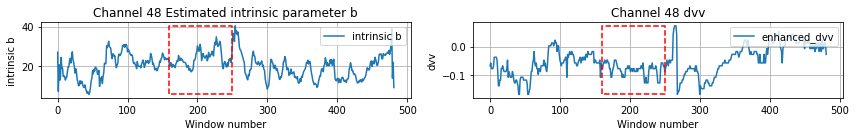

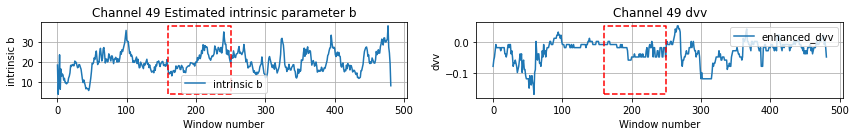

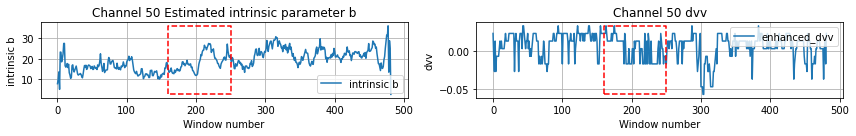

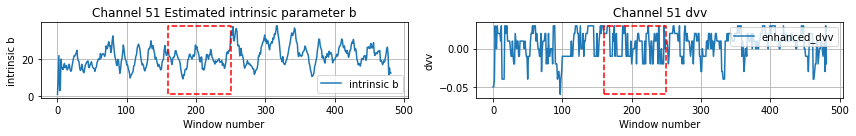

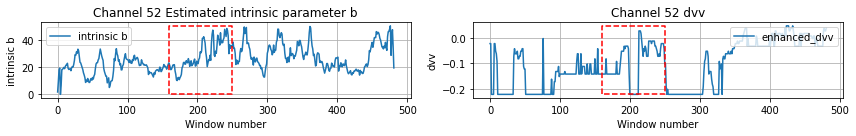

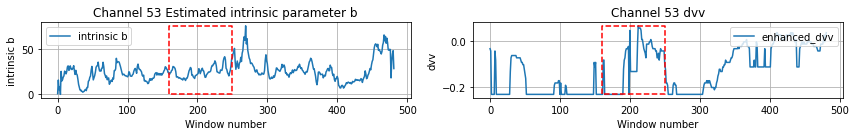

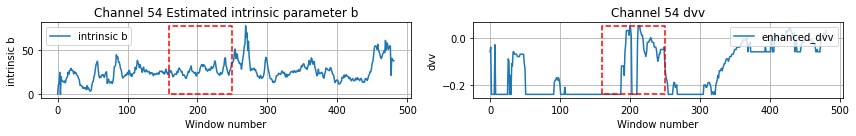

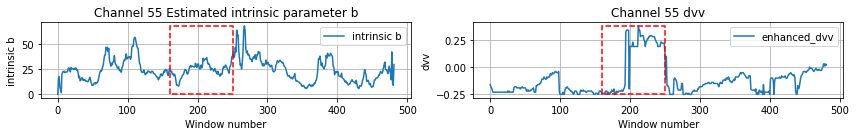

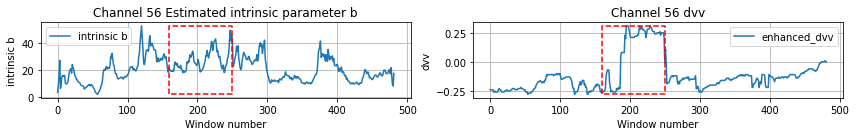

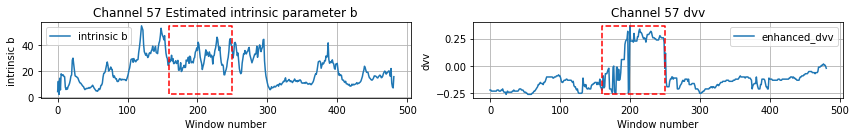

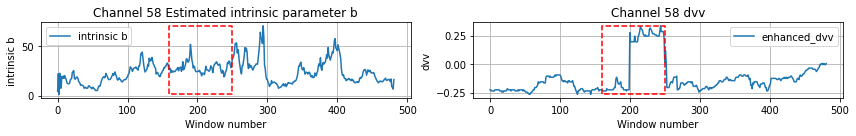

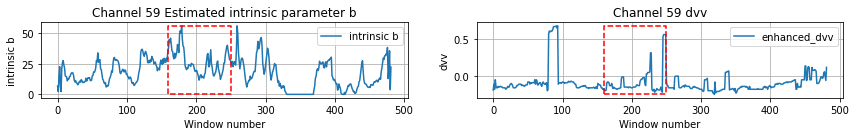

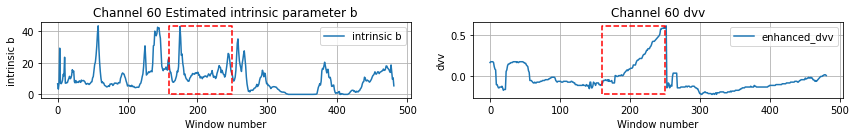

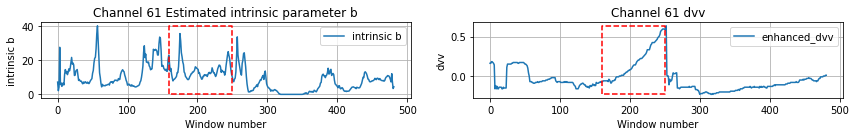

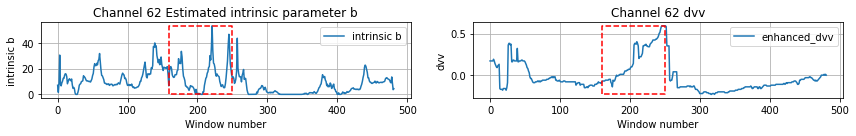

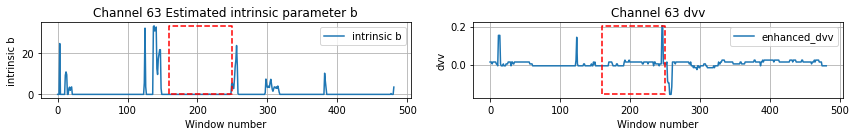

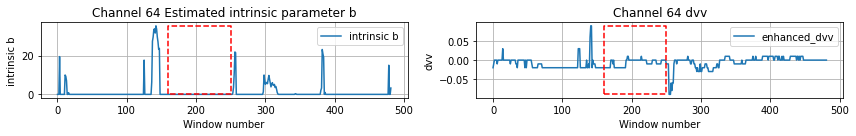

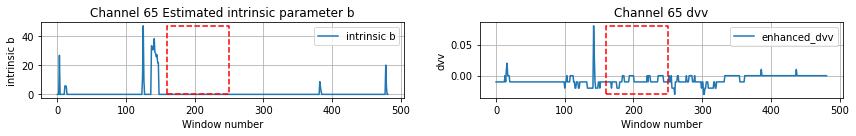

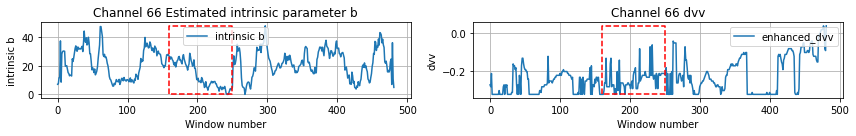

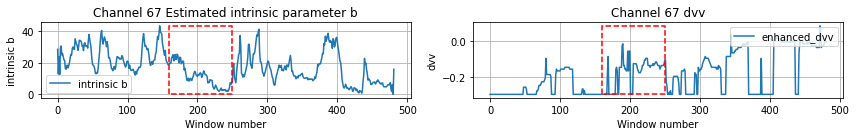

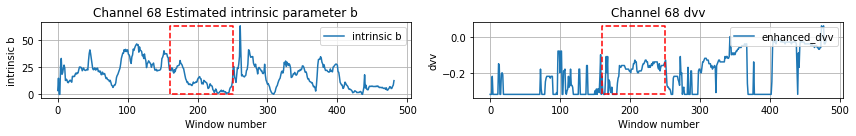

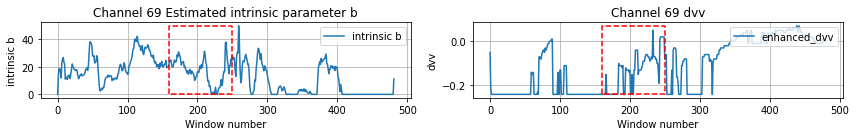

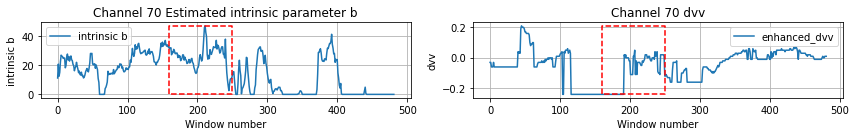

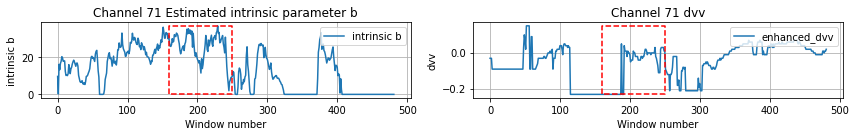

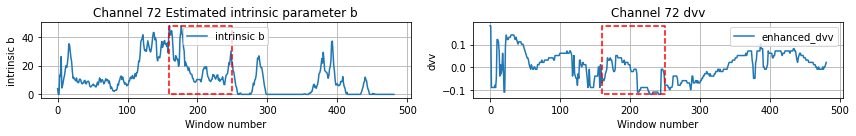

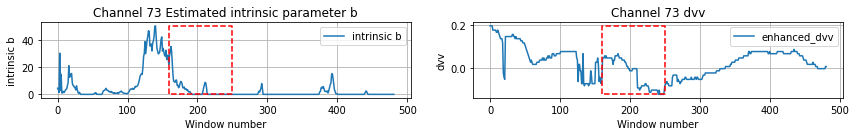

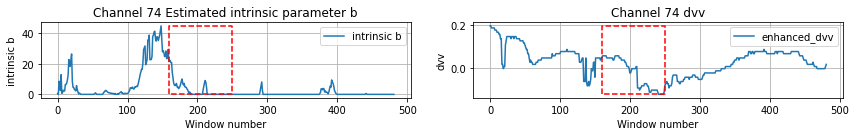

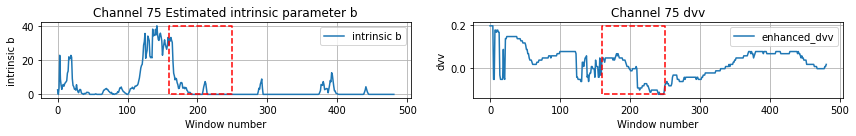

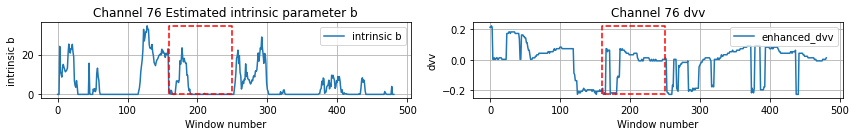

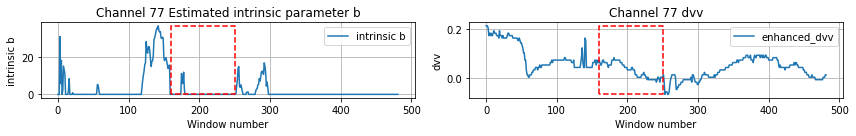

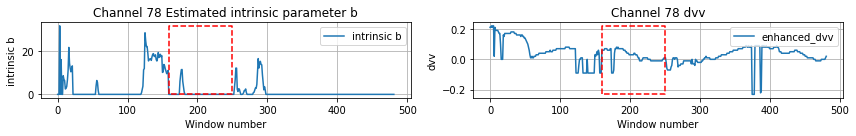

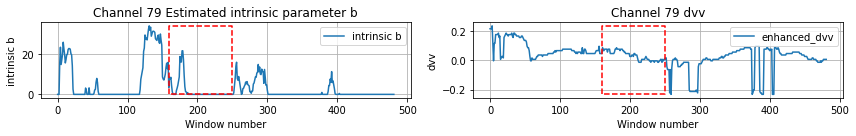

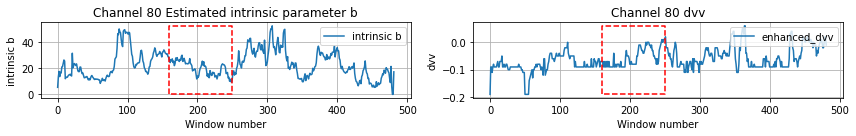

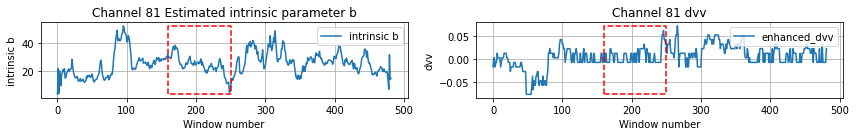

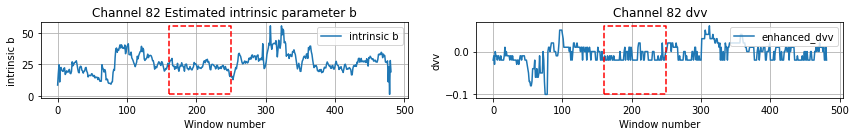

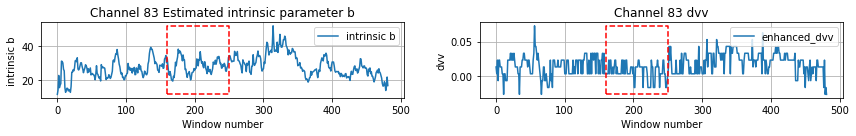

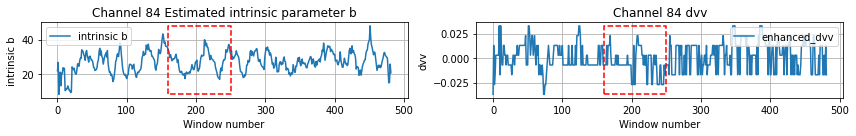

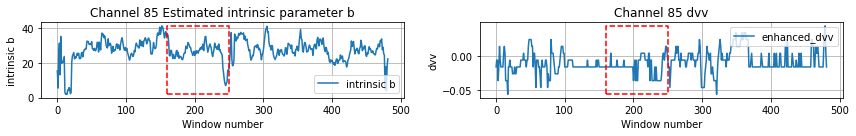

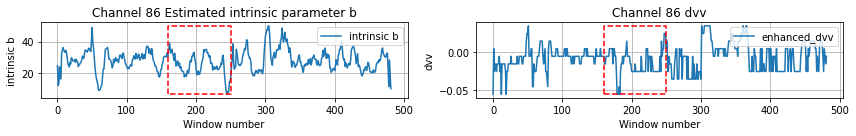

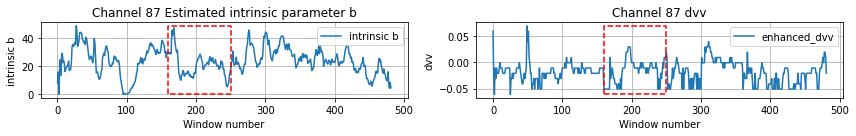

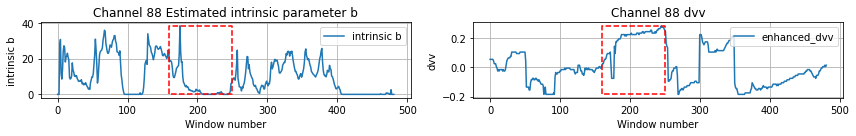

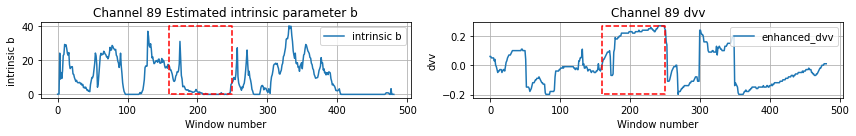

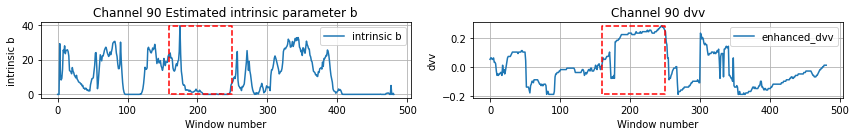

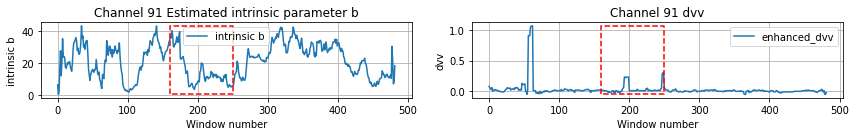

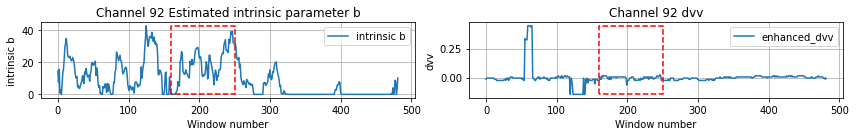

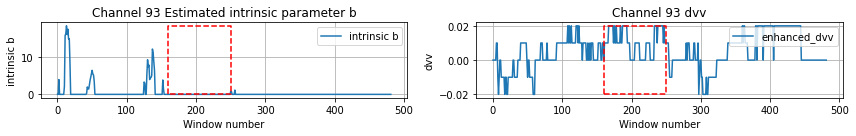

In [16]:
x=[160,160,250,250,160]
for chan in range(nlocs):
    chnm=locs[chan]
    fig,ax=plt.subplots(1,2,figsize=(12,2))
    ax[0].plot(VB[chan], label='intrinsic b')
    ax[0].legend();ax[0].grid(True)
    ax[0].set_title('Channel '+str(chnm)+' Estimated intrinsic parameter b')
    ax[0].set_xlabel('Window number')
    ax[0].set_ylabel('intrinsic b')
    y=[np.min(VB[chan]),np.max(VB[chan]), np.max(VB[chan]), np.min(VB[chan]) , np.min(VB[chan])]
    ax[0].plot(x,y,ls='--',color='red')
    
    ax[1].plot(enhanced_dvv[chan], label='enhanced_dvv')
    ax[1].legend(loc="upper right")
    ax[1].grid(True)
    ax[1].set_title('Channel '+str(chnm)+' dvv')
    ax[1].set_xlabel('Window number')
    ax[1].set_ylabel('dvv')
    y=[np.min(enhanced_dvv[chan]),np.max(enhanced_dvv[chan]), np.max(enhanced_dvv[chan]), np.min(enhanced_dvv[chan]) , np.min(enhanced_dvv[chan])]
    ax[1].plot(x,y,ls='--',color='red')

    

    plt.tight_layout()
plt.close(fig)
    

## Compare seismic variabilities with soil quality

(This is only in space)

Seismic: dV/V and b

Soil: tillage and tire pressure

In [31]:
interp_paras=pd.read_csv('/fd1/QibinShi_data/England_farm/interp_dv_b_tillage_tire.csv')

In [37]:
interp_paras.head()
b = interp_paras['intb_varibility']
v = interp_paras['dvv_varibility']
tl = interp_paras['tillage_depth']
tr = interp_paras['tire_pressure']

(-10.0, 150.0)

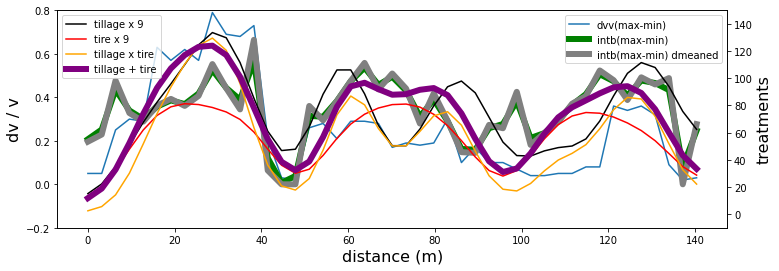

In [42]:
plt.figure(figsize=(12, 4))

plt.plot(np.arange(len(v))*dchan, v, label='dvv(max-min)')
plt.plot(np.arange(len(b))*dchan, b/80, label='intb(max-min)', color='g', lw=6)
plt.plot(np.arange(len(absintb[6:]))*dchan, absintb[6:]/80, label='intb(max-min) dmeaned', color='gray', lw=6)

plt.xlabel("distance (m)", fontsize = 16)
plt.ylabel("dv / v", fontsize = 16)
plt.legend()
plt.ylim(-0.2, 0.8)

axcopy = plt.twinx()
axcopy.plot(np.arange(len(tl))*dchan, tl*9, color='k', label='tillage x 9')
axcopy.plot(np.arange(len(tr))*dchan, tr*9, color='r', label='tire x 9')
axcopy.plot(np.arange(len(tr))*dchan, tl*tr, color='orange', label='tillage x tire')
axcopy.plot(np.arange(len(tr))*dchan, (tr*15+tl*tr)/2.1, color='purple', label='tillage + tire', lw=6)
axcopy.set_ylabel("treatments", fontsize = 16)
axcopy.legend()
axcopy.set_ylim(-10, 150)